In [2]:
!pip install --upgrade xlrd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
matplotlib.__version__

'3.5.2'

In [5]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


**1. DATA PREPROCESSING**

In [6]:
## Check Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
## Check Data Null
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [8]:
## Handling Null Data
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['city'] = df['city'].fillna('unknown')

In [9]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [10]:
## Correct Data Type of columns children, agent and company
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
## Check Unique Values
for col in df:
    print(f'''Unique Value kolom {col}:''')
    print(df.groupby(col).size())
    print()

Unique Value kolom hotel:
hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64

Unique Value kolom is_canceled:
is_canceled
0    75166
1    44224
dtype: int64

Unique Value kolom lead_time:
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
622      17
626      30
629      17
709       1
737       1
Length: 479, dtype: int64

Unique Value kolom arrival_date_year:
arrival_date_year
2017    21996
2018    56707
2019    40687
dtype: int64

Unique Value kolom arrival_date_month:
arrival_date_month
April         8068
August       10939
December     11160
February      6780
January       6794
July         11791
June         11089
March         5929
May           9794
November     10508
October      13877
September    12661
dtype: int64

Unique Value kolom arrival_date_week_number:
arrival_date_week_number
1     1047
2     1218
3     1319
4     1487
5     1387
6     1508
7     2109
8     2216
9     2117
10    2149
11    2070
12    2083
13    2416
14    

In [13]:
## Check Data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [14]:
## change value columns 'Meal'
df['meal'].replace('Undefined','No Meal',inplace=True)
print(df.groupby('meal').size())

meal
Breakfast     92310
Dinner        14463
Full Board      798
No Meal       11819
dtype: int64


In [15]:
## Create stay duration ('stays_in_weekend_nights' + 'stays_in_weekdays_nights') columns
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']


In [16]:
## Create total guests ('adults' + 'children' + 'babies') columns
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [17]:
## Drop Row which 'stay duration' & 'Total guests' value is 0
df1 = df[~(df['total_guests'] == 0 )]

In [18]:
df2 = df1[~(df1['stay_duration'] == 0 )]
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,total_guests
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.00,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.00,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.00,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.00,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,0,Personal,107.00,0,0,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,394,0,0,Personal,96.14,0,0,Check-Out,7,2
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,9,0,0,Personal,225.43,0,2,Check-Out,7,3
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,9,0,0,Personal,157.71,0,4,Check-Out,7,2
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,89,0,0,Personal,104.40,0,0,Check-Out,7,2


**2. MONTHLY HOTEL BOOKING ANALYSIS BASED ON HOTEL TYPE**

In [19]:
## Order Month for Better Data Visualization
df2['arrival_date_month'].replace({ 'January' : '01', 'February' : '02', 'March' : '03', 'April' : '04' ,'May' : '05', 'June' : '06', 'July' : '07', 'August' : '08', 'September' : '09', 'October' : '10', 'November' : '11', 'December' : '12' }, inplace=True)
df2['arrival_date_month']

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


2         09
3         09
4         09
5         09
6         09
          ..
119385    10
119386    10
119387    10
119388    10
119389    10
Name: arrival_date_month, Length: 118565, dtype: object

In [20]:
## Aggregation Monthly Booking Order
df2_grup = df2.groupby(['hotel','arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2_grup.columns = ['hotel_type', 'arrival_month', 'years', 'total_booking']
df2_grup

,hotel_type,arrival_month,years,total_booking
0,City Hotel,01,2,4309
1,City Hotel,02,2,4097
2,City Hotel,03,2,3712
3,City Hotel,04,2,4917
4,City Hotel,05,2,6411
5,City Hotel,06,2,7458
6,City Hotel,07,2,8184
7,City Hotel,08,2,7874
8,City Hotel,09,3,8054
9,City Hotel,10,3,8952


In [21]:
## Normalization September & October (every months have 2 years data except these two)
df2_grup['average_total_booking'] = round((df2_grup['total_booking']/df2_grup['years']),2)
df2_grup

,hotel_type,arrival_month,years,total_booking,average_total_booking
0,City Hotel,01,2,4309,2154.50
1,City Hotel,02,2,4097,2048.50
2,City Hotel,03,2,3712,1856.00
3,City Hotel,04,2,4917,2458.50
4,City Hotel,05,2,6411,3205.50
5,City Hotel,06,2,7458,3729.00
6,City Hotel,07,2,8184,4092.00
7,City Hotel,08,2,7874,3937.00
8,City Hotel,09,3,8054,2684.67
9,City Hotel,10,3,8952,2984.00


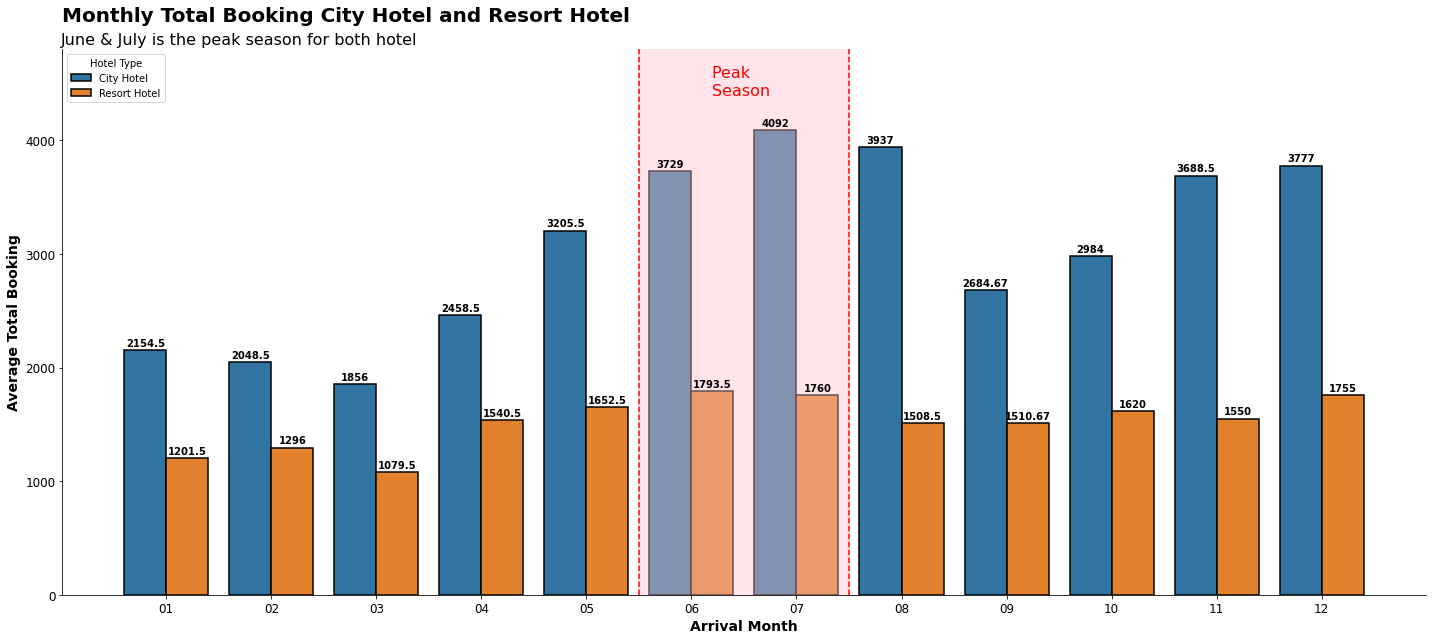

In [52]:
## Data Visualization
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(x='arrival_month', y='average_total_booking', hue='hotel_type', data=df2_grup, edgecolor='black', lw=1.5)

plt.title('Monthly Total Booking City Hotel and Resort Hotel \n',color='black',fontsize=20,fontweight='bold', loc='left')
plt.text( x = -1, y=4850, s='June & July is the peak season for both hotel', fontsize=16)
sns.despine()

plt.ylabel('Average Total Booking', fontsize=14, fontweight='bold')
plt.xlabel('Arrival Month', fontsize=14, fontweight='bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(title='Hotel Type', loc='upper left')

for i in ax.containers:
    ax.bar_label(i, fontweight='bold', padding=2, fontsize=10)

plt.axvline(4.5, ls='--', color='red')
plt.axvline(6.5, ls='--', color='red')
plt.text(x=5.2, y=4400, s='Peak \nSeason', fontsize=16, color='red')
plt.stackplot(np.arange(4.5,7.25,1), [[4800]], color='pink', alpha=0.4)

plt.ylim(0, 4800)
plt.tight_layout()
plt.show()

3. IMPACT ANALYSIS OF STAY DURATION ON HOTEL BOOKINGS CANCELLATION RATES

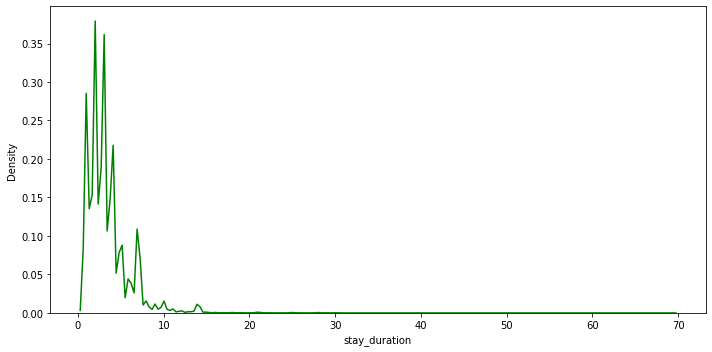

In [53]:
## Check The Distribution Data of Stay Duration
plt.figure(figsize=(10, 5))
sns.kdeplot(x=df2['stay_duration'], color='green')
plt.tight_layout()

In [56]:
## Make group value of stay duration
df2['stay_duration_group'] = np.where(df2['stay_duration'] < 8, 'weeks 1',
                             (np.where((df2['stay_duration'] > 7) & (df2['stay_duration'] < 15), 'weeks 2',
                             (np.where((df2['stay_duration'] > 14) & (df2['stay_duration'] < 22), 'weeks 3', 'weeks 4')))))
df2['stay_duration_group']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


2         weeks 1
3         weeks 1
4         weeks 1
5         weeks 1
6         weeks 1
           ...   
119385    weeks 1
119386    weeks 1
119387    weeks 1
119388    weeks 1
119389    weeks 2
Name: stay_duration_group, Length: 118565, dtype: object

In [57]:
## Aggregation stay duration and cancellation ratio
df3 = df2.groupby(['hotel','stay_duration_group','is_canceled']).agg({'hotel':['count']}).reset_index()
df3.columns = ['hotel_type','stay_duration_group','is_canceled','booking']
df3_pivot = df3.pivot_table(index=['hotel_type','stay_duration_group'], columns = ['is_canceled'], values = ['booking']).reset_index()
df3_pivot.columns = ['hotel_type','stay_duration_group','0','1']
df3_pivot['cancel_rate'] = round((df3_pivot['1']/(df3_pivot['0']+df3_pivot['1'])*100),2)
df3_pivot 

,hotel_type,stay_duration_group,0,1,cancel_rate
0,City Hotel,weeks 1,45287,32391,41.70
1,City Hotel,weeks 2,511,558,52.20
2,City Hotel,weeks 3,29,76,72.38
3,City Hotel,weeks 4,6,41,87.23
4,Resort Hotel,weeks 1,25754,9907,27.78
5,Resort Hotel,weeks 2,2650,1078,28.92
6,Resort Hotel,weeks 3,90,79,46.75
7,Resort Hotel,weeks 4,62,46,42.59


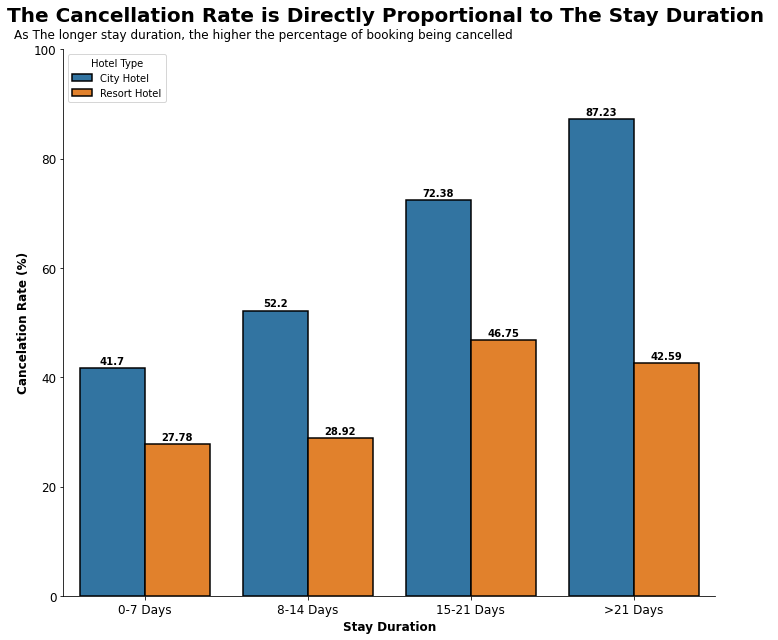

In [65]:
## Data Visualization
fig, ax = plt.subplots(figsize=(10,9))
sns.barplot(x='stay_duration_group', y='cancel_rate', hue='hotel_type', data=df3_pivot, edgecolor='black', lw=1.5)

plt.title('The Cancellation Rate is Directly Proportional to The Stay Duration \n ',color='black',fontsize=20,fontweight='bold')
plt.text( x = -0.8, y=102, s='As The longer stay duration, the higher the percentage of booking being cancelled', fontsize=12)
sns.despine()

plt.ylabel('Cancelation Rate (%)', fontsize=12, fontweight='bold')
plt.xlabel('Stay Duration', fontsize=12, fontweight='bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(title='Hotel Type', loc='upper left')
plt.xticks(range(0,4,1), labels=['0-7 Days', '8-14 Days', '15-21 Days', '>21 Days'])

for i in ax.containers:
    ax.bar_label(i, fontweight='bold', padding=2, fontsize=10)
    
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

4. IMPACT ANALYSIS OF LEAD TIME ON HOTEL BOOKINGS CANCELLATION RATES

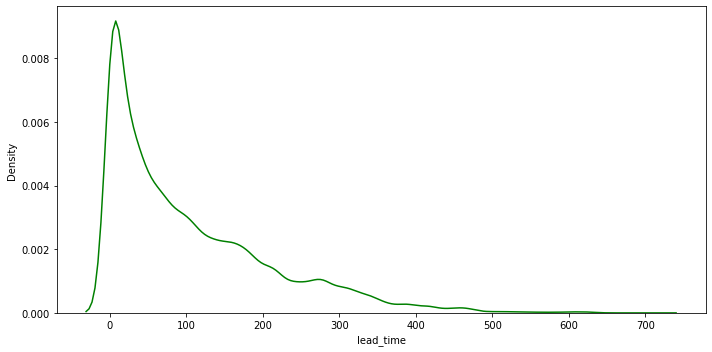

In [66]:
## Check th Distribution of Lead Time
plt.figure(figsize=(10, 5))
sns.kdeplot(x=df2['lead_time'], color='green')
plt.tight_layout()

In [67]:
## Make Group Value fo Lead Time
def lead_group(x):
    if x['lead_time'] <= 30 :
        lead_group = 30
    elif x['lead_time'] > 30 and x['lead_time'] <= 60 :
        lead_group = 60
    elif x['lead_time'] > 60 and x['lead_time'] <= 90 :
        lead_group = 90
    elif x['lead_time'] > 90 and x['lead_time'] <= 120 :
        lead_group = 120
    elif x['lead_time'] > 120 and x['lead_time'] <= 150 :
        lead_group = 150
    elif x['lead_time'] > 150 and x['lead_time'] <= 180 :
        lead_group = 180
    elif x['lead_time'] > 180 and x['lead_time'] <= 210 :
        lead_group = 210
    elif x['lead_time'] > 210 and x['lead_time'] <= 240 :
        lead_group = 240
    elif x['lead_time'] > 240 and x['lead_time'] <= 270 :
        lead_group = 270
    elif x['lead_time'] > 270 and x['lead_time'] <= 300 :
        lead_group = 300
    elif x['lead_time'] > 300 and x['lead_time'] <= 330 :
        lead_group = 330
    elif x['lead_time'] > 330 and x['lead_time'] <= 360 :
        lead_group = 360
    else :
        lead_group = 365
    return lead_group

df2['lead_time_group'] = df2.apply(lambda x : lead_group(x), axis=1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration,total_guests,stay_duration_group,lead_time_group
2,Resort Hotel,0,7,2017,09,27,1,0,1,1,...,0,Personal,75.00,0,0,Check-Out,1,1,weeks 1,30
3,Resort Hotel,0,13,2017,09,27,1,0,1,1,...,0,Personal,75.00,0,0,Check-Out,1,1,weeks 1,30
4,Resort Hotel,0,14,2017,09,27,1,0,2,2,...,0,Personal,98.00,0,1,Check-Out,2,2,weeks 1,30
5,Resort Hotel,0,14,2017,09,27,1,0,2,2,...,0,Personal,98.00,0,1,Check-Out,2,2,weeks 1,30
6,Resort Hotel,0,0,2017,09,27,1,0,2,2,...,0,Personal,107.00,0,0,Check-Out,2,2,weeks 1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,10,35,30,2,5,2,...,0,Personal,96.14,0,0,Check-Out,7,2,weeks 1,30
119386,City Hotel,0,102,2019,10,35,31,2,5,3,...,0,Personal,225.43,0,2,Check-Out,7,3,weeks 1,120
119387,City Hotel,0,34,2019,10,35,31,2,5,2,...,0,Personal,157.71,0,4,Check-Out,7,2,weeks 1,60
119388,City Hotel,0,109,2019,10,35,31,2,5,2,...,0,Personal,104.40,0,0,Check-Out,7,2,weeks 1,120


In [68]:
## Aggregation Lead Time and cancellation ratio
df4 = df2.groupby(['hotel','lead_time_group','is_canceled']).agg({'hotel':['count']}).reset_index()

In [69]:
df4.columns = ['hotel_type','lead_time_group','is_canceled','booking']
df4_pivot = df4.pivot_table(index=['hotel_type','lead_time_group'], columns = ['is_canceled'], values = ['booking']).reset_index()
df4_pivot.columns = ['hotel_type','lead_time_group','0','1']
df4_pivot['cancel_rate'] = round((df4_pivot['1']/(df4_pivot['0']+df4_pivot['1'])*100),2)
df4_pivot

,hotel_type,lead_time_group,0,1,cancel_rate
0,City Hotel,30,17848,5174,22.47
1,City Hotel,60,7251,4607,38.85
2,City Hotel,90,5200,3690,41.51
3,City Hotel,120,3955,3486,46.85
4,City Hotel,150,3061,2542,45.37
5,City Hotel,180,2440,2716,52.68
6,City Hotel,210,1797,1793,49.94
7,City Hotel,240,1223,1280,51.14
8,City Hotel,270,878,1237,58.49
9,City Hotel,300,659,1859,73.83


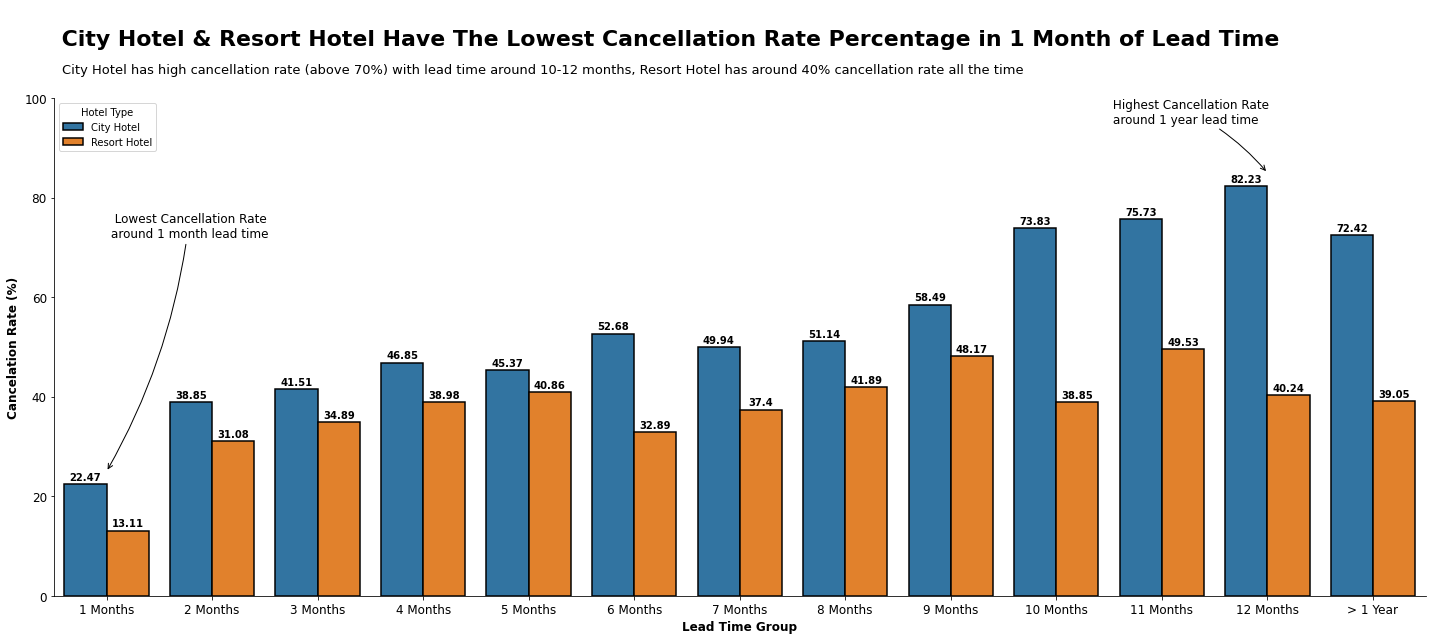

In [90]:
## Data Visualization
fig, ax = plt.subplots(figsize=(20,9))
sns.barplot(x='lead_time_group', y='cancel_rate', hue='hotel_type', data=df4_pivot, edgecolor='black', lw=1.5)

plt.title('\n City Hotel & Resort Hotel Have The Lowest Cancellation Rate Percentage in 1 Month of Lead Time \n \n',color='black',fontsize=22,fontweight='bold', loc='left')
plt.text( x = -0.42, y=105, s='City Hotel has high cancellation rate (above 70%) with lead time around 10-12 months, Resort Hotel has around 40% cancellation rate all the time', fontsize=13)
sns.despine()

plt.ylabel('Cancelation Rate (%)', fontsize=12, fontweight='bold')
plt.xlabel('Lead Time Group', fontsize=12, fontweight='bold')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.legend(title='Hotel Type', loc='upper left')
plt.xticks(range(0,13,1), labels=['1 Months', '2 Months', '3 Months', '4 Months', '5 Months','6 Months','7 Months','8 Months','9 Months','10 Months','11 Months','12 Months','> 1 Year'])

plt.annotate("  Lowest Cancellation Rate \n around 1 month lead time", xy=(0, 25), xytext=(0, 72), fontsize=12, arrowprops=dict(ec='black',arrowstyle='->', connectionstyle="arc3,rad=-.1"))
plt.annotate(" Highest Cancellation Rate \n around 1 year lead time", xy=(11, 85), xytext=(9.5, 95), fontsize=12, arrowprops=dict(ec='black',arrowstyle='->', connectionstyle="arc3,rad=-.1"))

for i in ax.containers:
    ax.bar_label(i, fontweight='bold', padding=2, fontsize=10)
    
plt.ylim(0, 100)
plt.tight_layout()
plt.show()